In [31]:
from data_loader import get_loader 
import pickle
from build_vocab import Vocabulary

import argparse
import torch
import torch.nn as nn
import numpy as np
import os
import pickle
from data_loader import get_loader 
from build_vocab import Vocabulary
from model import EncoderCNN, DecoderRNN
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import transforms

image_dir = 'data/resized2014'
caption_path = 'annotations/captions_train2014.json'
# vocab = ''
batch_size ='128'
vocab_path = 'vocab.pkl'
transform = transforms.Compose([ 
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(), 
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])

with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)
data_loader = get_loader(image_dir, caption_path, vocab, 
                         transform, 128,
                         shuffle=True, num_workers=2) 


loading annotations into memory...
Done (t=0.95s)
creating index...
index created!
torch.Size([128, 3, 224, 224])
torch.Size([128, 20])
torch.Size([128, 3, 224, 224])
torch.Size([128, 23])
torch.Size([128, 3, 224, 224])
torch.Size([128, 23])
torch.Size([128, 3, 224, 224])
torch.Size([128, 23])
torch.Size([128, 3, 224, 224])
torch.Size([128, 24])
torch.Size([128, 3, 224, 224])
torch.Size([128, 22])
torch.Size([128, 3, 224, 224])
torch.Size([128, 24])
torch.Size([128, 3, 224, 224])
torch.Size([128, 22])
torch.Size([128, 3, 224, 224])
torch.Size([128, 32])
torch.Size([128, 3, 224, 224])
torch.Size([128, 31])
torch.Size([128, 3, 224, 224])
torch.Size([128, 27])
torch.Size([128, 3, 224, 224])
torch.Size([128, 21])
torch.Size([128, 3, 224, 224])
torch.Size([128, 29])
torch.Size([128, 3, 224, 224])
torch.Size([128, 23])
torch.Size([128, 3, 224, 224])
torch.Size([128, 28])
torch.Size([128, 3, 224, 224])
torch.Size([128, 20])
torch.Size([128, 3, 224, 224])
torch.Size([128, 22])
torch.Size([128,

KeyboardInterrupt: 

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3456d91620>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3456d91620>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3456d91620>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/data

torch.Size([128, 55])
<start>
an
oval
mirror
with
wood
frame
reflects
a
white
room
,
small
bright
window
,
clutter
,
hanging
items
on
clothes
<unk>
.
and
a
camera
close
to
the
mirror
with
a
toy
bear
posed
to
appear
to
work
it
,
and
a
second
bear
,
its
face
pressed
to
the
glass
.
<end>
torch.Size([128, 21])
<start>
three
young
children
sit
,
peering
intently
at
some
subway
tracks
,
a
pile
of
luggage
behind
them
.
<end>
torch.Size([128, 36])
<start>
side
view
of
two
standing
elephants
with
a
man
on
neck
of
one
,
both
elephants
with
trunks
to
ground
,
in
front
of
two
long
logs
outside
with
hut
and
trees
behind
.
<end>
torch.Size([128, 20])
<start>
a
man
riding
a
skateboard
down
a
street
while
others
are
waiting
to
get
on
behind
him
.
<end>
torch.Size([128, 24])
<start>
a
person
that
is
riding
on
a
brown
colored
horse
,
in
a
grass
field
with
tall
trees
in
the
background
.
<end>
torch.Size([128, 39])
<start>
a
food
counter
area
,
with
a
man
and
a
woman
behind
the
counter
preparing
food
and


KeyboardInterrupt: 

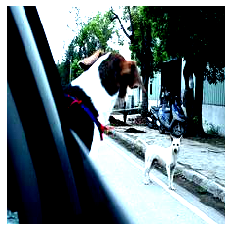

In [42]:
for i, (images, captions, lengths) in enumerate(data_loader):
    myimshow(images[0])
    print(captions.shape)
    for i in list(captions[0].data.numpy()):
        #pass
        print(vocab.idx2word[i])
    #break

In [40]:
import matplotlib.pyplot as plt 

def myimshow(image, ax=plt):
    image = image.to('cpu').numpy()
    image = np.moveaxis(image, [0, 1, 2], [2, 0, 1])
    image = (image + 1) / 2
    image[image < 0] = 0
    image[image > 1] = 1
    h = ax.imshow(image)
    ax.axis('off')
    return h